WHERE SHOULD Harry Potter MOVE AROUND IN THE WORLD?

After going through the description of the dataset, I framed 3 problem statements:


1.   Which is the best place to move by deducting cost of living information from the dataset.
2.   Which is the best place to set up a grocery store to get the maximum profit by trying to deduct the buying power

1.   Where can I market a particular product based on the buying potential

Since 2, 3 needed extra data such as time, status of a country, inflation, deflation, etc. to calculate the buying power, it was not possible to achieve it.

Hence, I decided to go with the first problem statement





In [1]:
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm
import pickle

This dataset contains information about the cost of living in almost 5000 cities across the world. The following are the columns and what it represents:

City	Name

Country	Name 

x1	Meal, Inexpensive Restaurant (USD)

x2	Meal for 2 People, Mid-range Restaurant, Three-course (USD)

x3	McMeal at McDonalds (or Equivalent Combo Meal) (USD)

x4	Domestic Beer (0.5 liter draught, in restaurants) (USD)

x5	Imported Beer (0.33 liter bottle, in restaurants) (USD)

x6	Cappuccino (regular, in restaurants) (USD)

x7	Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)

x8	Water (0.33 liter bottle, in restaurants) (USD)

x9	Milk (regular), (1 liter) (USD)

x10	Loaf of Fresh White Bread (500g) (USD)

x11	Rice (white), (1kg) (USD)

x12	Eggs (regular) (12) (USD)

x13	Local Cheese (1kg) (USD)

x14	Chicken Fillets (1kg) (USD)

x15	Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)

x16	Apples (1kg) (USD)

x17	Banana (1kg) (USD)

x18	Oranges (1kg) (USD)

x19	Tomato (1kg) (USD)

x20	Potato (1kg) (USD)

x21	Onion (1kg) (USD)

x22	Lettuce (1 head) (USD)

x23	Water (1.5 liter bottle, at the market) (USD)

x24	Bottle of Wine (Mid-Range, at the market) (USD)

x25	Domestic Beer (0.5 liter bottle, at the market) (USD)

x26	Imported Beer (0.33 liter bottle, at the market) (USD)

x27	Cigarettes 20 Pack (Marlboro) (USD)

x28	One-way Ticket (Local Transport) (USD)

x29	Monthly Pass (Regular Price) (USD)

x30	Taxi Start (Normal Tariff) (USD)

x31	Taxi 1km (Normal Tariff) (USD)

x32	Taxi 1hour Waiting (Normal Tariff) (USD)

x33	Gasoline (1 liter) (USD)

x34	Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD)

x35	Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD)

x36	Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment 
(USD)

x37	1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans) (USD)

x38	Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)

x39	Fitness Club, Monthly Fee for 1 Adult (USD)

x40	Tennis Court Rent (1 Hour on Weekend) (USD)

x41	Cinema, International Release, 1 Seat (USD)

x42	Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD)

x43	International Primary School, Yearly for 1 Child (USD)

x44	1 Pair of Jeans (Levis 501 Or Similar) (USD)

x45	1 Summer Dress in a Chain Store (Zara, H&M, …) (USD)

x46	1 Pair of Nike Running Shoes (Mid-Range) (USD)

x47	1 Pair of Men Leather Business Shoes (USD)

x48	Apartment (1 bedroom) in City Centre (USD)

x49	Apartment (1 bedroom) Outside of Centre (USD)

x50	Apartment (3 bedrooms) in City Centre (USD)

x51	Apartment (3 bedrooms) Outside of Centre (USD)

x52	Price per Square Meter to Buy Apartment in City Centre (USD)

x53	Price per Square Meter to Buy Apartment Outside of Centre (USD)

x54	Average Monthly Net Salary (After Tax) (USD)

x55	Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate

data_quality	0 if Numbeo.com (from where the data was taken) considers that more contributors are needed to 
increase data quality, else 1


In [2]:
data_df = pd.read_csv('/content/cost-of-living_v2.csv')
data_df.tail(10)

city   country    x1    x2    x3    x4   x5    x6    x7    x8  \
4946          Harare  Zimbabwe  7.00  40.0  6.00  1.30  2.0  2.20  0.72  0.47   
4947        Bulawayo  Zimbabwe  3.50  30.0  6.75  1.25  1.8  2.83  0.50   NaN   
4948     Chitungwiza  Zimbabwe  7.00  40.0  6.00  1.30  2.0  2.20  0.72  0.47   
4949          Mutare  Zimbabwe  7.00  40.0  6.00  1.30  2.0  2.20  0.72  0.47   
4950           Gweru  Zimbabwe  7.00  40.0  6.00  1.30  2.0  2.20  0.72  0.47   
4951        Masvingo  Zimbabwe  7.00  40.0  6.00  1.30  2.0  2.20  0.72  0.47   
4952          Hwange  Zimbabwe  9.25  20.0  6.75  1.50  NaN  2.25  0.50   NaN   
4953  Victoria Falls  Zimbabwe   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   
4954        Redcliff  Zimbabwe  7.00  40.0  6.00  1.30  2.0  2.20  0.72  0.47   
4955           Karoi  Zimbabwe   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   

      ...    x47     x48     x49     x50     x51     x52      x53     x54  \
4946  ...  51.43  296.43  296.00  887.50  762.50  1344.1  1500.00  272.22   
4947  ...  65.00  233.33  123.33  416.67  366.67   900.0      NaN  350.00   
4948  ...  51.43     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
4949  ...  51.43     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
4950  ...  51.43     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
4951  ...  51.43   60.00     NaN  300.00  150.00     NaN   582.52     NaN   
4952  ...  55.00     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
4953  ...    NaN     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
4954  ...  51.43     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
4955  ...    NaN     NaN     NaN     NaN     NaN     NaN      NaN     NaN   

       x55  data_quality  
4946  15.0             1  
4947   NaN             0  
4948  15.0             0  
4949  15.0             0  
4950  15.0             0  
4951  15.0             0  
4952   NaN             0  
4953   NaN             0  
4954  15.0             0  
4955   NaN             0  

[10 rows x 58 columns]

In [3]:
data_df.shape

(4956, 58)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          4956 non-null   object 
 1   country       4956 non-null   object 
 2   x1            4528 non-null   float64
 3   x2            4505 non-null   float64
 4   x3            4622 non-null   float64
 5   x4            4460 non-null   float64
 6   x5            4516 non-null   float64
 7   x6            4612 non-null   float64
 8   x7            4511 non-null   float64
 9   x8            4640 non-null   float64
 10  x9            4578 non-null   float64
 11  x10           4543 non-null   float64
 12  x11           4613 non-null   float64
 13  x12           4449 non-null   float64
 14  x13           4478 non-null   float64
 15  x14           4398 non-null   float64
 16  x15           4390 non-null   float64
 17  x16           4584 non-null   float64
 18  x17           4575 non-null 

Renaming the column names 

In [5]:
data_copy = data_df.rename(columns={'x1': 'Cheap_Res','x2': 'Mid_range_res', 'x3': 'McDMeal', 'x4': 'Dom_beer_res', 'x5': 'Imp_beer_res',
                                    'x6': 'Cappuccino', 'x7': 'Coke/Pepsi', 'x8': 'Water_res', 'x9': 'Milk', 'x10': 'Bread_loaf',
                                    'x11': 'White_rice', 'x12': 'Eggs', 'x13': 'Local_cheese', 'x14': 'Chiken_fillet', 'x15': 'Beef_1kg',
                                    'x16': 'Apples_1kg', 'x17': 'Banana_1kg', 'x18': 'Orange_1kg', 'x19': 'Tomato_1kg', 'x20': 'Potato_1kg',
                                    'x21': 'Onion_1kg', 'x22': 'Lettuce_1head', 'x23': 'Water_bottle', 'x24': 'Wine_bottle', 'x25': 'Dom_beer_bottle',
                                    'x26': 'Imp_beer_bottle', 'x27': 'Cigar_20packs', 'x28': 'Local_transport_oneway_ticket','x29': 'Monthly_pass', 'x30': 'taxi_start',
                                    'x31': 'Taxi_1km', 'x32': 'Taxi_wait_1hr', 'x33': 'Gasoline_1L', 'x34': 'Volkswagen Golf 1.4 90 KW Trendline', 'x35': 'Toyota Corolla Sedan 1.6l 97kW Comfort',
                                    'x36': 'Amenities_85sq.m', 'x37': 'Mobile_prepaid_1min', 'x38': 'Internet_UnLtd_60Mbps', 'x39': 'Fitness_monthly', 'x40': 'Tennis_court_rent_1hr',
                                    'x41': 'Cinema', 'x42': 'KG_monthly', 'x43': 'Primary_yearly', 'x44': 'Levi_jeans', 'x45': 'Chain_store_summer_dress',
                                    'x46': 'Nike_running_shoes', 'x47': 'Leather_business_shoes', 'x48': 'Appartment_CC_1b', 'x49':'Appartment_out_CC_1b', 'x50': 'Appartment_CC_3b',
                                    'x51': 'Appartment_out_CC_3b', 'x52': 'Appartment_sale_perSq.m_CC', 'x53': 'Appartment_sale_perSq.m_out_CC', 'x54': 'Avg._monthly_net_salary',
                                    'x55': 'Mortgage_interest_%_yearly'})
data_copy.head(5)

city      country  Cheap_Res  Mid_range_res  McDMeal  \
0           Kabul  Afghanistan       1.69           5.65     3.11   
1           Herat  Afghanistan       1.69           6.21     2.82   
2  Mazar-e Sharif  Afghanistan       1.69           7.81     2.99   
3       Jalalabad  Afghanistan        NaN            NaN      NaN   
4      Shibirghan  Afghanistan       1.69           7.81     2.99   

   Dom_beer_res  Imp_beer_res  Cappuccino  Coke/Pepsi  Water_res  ...  \
0           NaN           NaN        0.93        0.23       0.13  ...   
1          2.26           NaN        0.56        0.40       0.11  ...   
2           NaN           NaN        0.45        0.34       0.16  ...   
3           NaN           NaN         NaN         NaN        NaN  ...   
4           NaN           NaN        0.45        0.34       0.16  ...   

   Leather_business_shoes  Appartment_CC_1b  Appartment_out_CC_1b  \
0                   36.16            108.92                 64.97   
1                   19.77             62.15                 39.55   
2                     NaN             67.80                 33.90   
3                     NaN             90.40                   NaN   
4                     NaN               NaN                   NaN   

   Appartment_CC_3b  Appartment_out_CC_3b  Appartment_sale_perSq.m_CC  \
0            228.81                146.89                      694.92   
1            112.99                 79.10                      480.78   
2            112.99                 56.50                      282.49   
3               NaN                   NaN                         NaN   
4               NaN                   NaN                         NaN   

   Appartment_sale_perSq.m_out_CC  Avg._monthly_net_salary  \
0                          355.93                   195.86   
1                          248.42                   152.54   
2                          112.99                   225.99   
3                             NaN                      NaN   
4                             NaN                      NaN   

   Mortgage_interest_%_yearly  data_quality  
0                       13.88             1  
1                       10.30             0  
2                         NaN             0  
3                        9.40             0  
4                         NaN             0  

[5 rows x 58 columns]

In [6]:
data_copy.columns

Index(['city', 'country', 'Cheap_Res', 'Mid_range_res', 'McDMeal',
       'Dom_beer_res', 'Imp_beer_res', 'Cappuccino', 'Coke/Pepsi', 'Water_res',
       'Milk', 'Bread_loaf', 'White_rice', 'Eggs', 'Local_cheese',
       'Chiken_fillet', 'Beef_1kg', 'Apples_1kg', 'Banana_1kg', 'Orange_1kg',
       'Tomato_1kg', 'Potato_1kg', 'Onion_1kg', 'Lettuce_1head',
       'Water_bottle', 'Wine_bottle', 'Dom_beer_bottle', 'Imp_beer_bottle',
       'Cigar_20packs', 'Local_transport_oneway_ticket', 'Monthly_pass',
       'taxi_start', 'Taxi_1km', 'Taxi_wait_1hr', 'Gasoline_1L',
       'Volkswagen Golf 1.4 90 KW Trendline',
       'Toyota Corolla Sedan 1.6l 97kW Comfort', 'Amenities_85sq.m',
       'Mobile_prepaid_1min', 'Internet_UnLtd_60Mbps', 'Fitness_monthly',
       'Tennis_court_rent_1hr', 'Cinema', 'KG_monthly', 'Primary_yearly',
       'Levi_jeans', 'Chain_store_summer_dress', 'Nike_running_shoes',
       'Leather_business_shoes', 'Appartment_CC_1b', 'Appartment_out_CC_1b',
       'Appartment

In [7]:
#checking the number of countries in the dataset
data_copy.country.unique().size


215

In [8]:
#Checking how many datapoints are related to India
India = data_copy[data_copy['country']=='India']
India

city country  Cheap_Res  Mid_range_res  McDMeal  Dom_beer_res  \
1393         Mumbai   India       3.68          18.42     3.68          2.46   
1394          Delhi   India       4.91          22.11     4.30          1.84   
1395        Kolkata   India       2.00          14.74     3.68          2.21   
1396      Bangalore   India       3.07          18.42     4.30          2.21   
1397        Chennai   India       2.18          12.28     4.91          2.21   
...             ...     ...        ...            ...      ...           ...   
1555   Nallacheruvu   India       1.84           7.37     3.68          1.29   
1556      Cherukuru   India       4.61           7.37     3.62          0.86   
1557  Elakkurichchi   India       1.23           6.14     3.68          2.46   
1558       Karavadi   India       1.35          11.05     3.56          1.04   
1559       Tirupati   India       2.46           9.21     4.30          2.21   

      Imp_beer_res  Cappuccino  Coke/Pepsi  Water_res  ...  \
1393          4.30        2.48        0.48       0.19  ...   
1394          3.68        1.77        0.49       0.19  ...   
1395          3.68        1.64        0.36       0.15  ...   
1396          3.68        2.09        0.46       0.18  ...   
1397          4.30        1.63        0.44       0.18  ...   
...            ...         ...         ...        ...  ...   
1555          3.07        1.23        0.39       0.18  ...   
1556          2.21        1.47        0.34       0.10  ...   
1557          2.46        2.46        0.25       0.15  ...   
1558          2.15        1.56        0.78       0.21  ...   
1559          3.07        1.47        0.46       0.14  ...   

      Leather_business_shoes  Appartment_CC_1b  Appartment_out_CC_1b  \
1393                   41.17            522.40                294.05   
1394                   36.50            229.84                135.31   
1395                   34.08            148.65                 84.89   
1396                   37.25            240.59                145.91   
1397                   34.67            180.73                107.59   
...                      ...               ...                   ...   
1555                   15.78               NaN                   NaN   
1556                   18.42             45.03                 28.66   
1557                   30.70               NaN                   NaN   
1558                   26.41               NaN                   NaN   
1559                   37.25             82.90                 61.41   

      Appartment_CC_3b  Appartment_out_CC_3b  Appartment_sale_perSq.m_CC  \
1393           1411.12                699.80                     6092.45   
1394            601.02                329.15                     2506.73   
1395            388.92                248.24                     1038.75   
1396            639.32                355.79                     1638.59   
1397            439.84                259.71                     1948.95   
...                ...                   ...                         ...   
1555               NaN                   NaN                         NaN   
1556            122.82                102.35                      307.04   
1557               NaN                   NaN                         NaN   
1558               NaN                   NaN                         NaN   
1559            184.23                128.96                      661.00   

      Appartment_sale_perSq.m_out_CC  Avg._monthly_net_salary  \
1393                         2777.51                   640.81   
1394                         1036.74                   586.46   
1395                          587.51                   532.21   
1396                          810.46                   969.96   
1397                          690.30                   552.68   
...                              ...                      ...   
1555                             NaN                      NaN   
1556       

In [9]:
#Trying to clean the data based on the data_quality column of the dataset
#Checking total number of data points with data_quality = 0
bad_quality_data = data_copy[data_copy['data_quality']==0]
bad_quality_data.shape

(4033, 58)

In [10]:
#Checking total numbre of data points with data_quality = 1
Good_quality_data = data_copy[data_copy['data_quality']==1]
Good_quality_data.shape

(923, 58)

Looks like the majority are termed as bad quality data by numbeo.com from where the data was scraped. 

Using just the good quality data felt too small and insufficient (923, 58). Therefore, I decided to clean the data in a way that can enable retaining more data points.

In [11]:
data_copy.isnull().sum().sum()


45858

In [12]:
# Deleting all the rows with missing data
dFDropna=data_copy.copy() 
print(dFDropna.shape)#dimension of the data before removing rows
dFDropna=dFDropna.dropna() 
print(dFDropna.shape)#dimension of the data after removing rows
print('Total number of missing values after dropna: ',dFDropna.isnull().sum().sum())

(4956, 58)
(1278, 58)
Total number of missing values after dropna:  0


Droping all the null value rows also seemed to reduced the dataset size dramatically. Hence I tried further to clean the dataset by interpolating. 

I tried to interpolate the value by grouping the countries together.

In [13]:
grouped = data_df.groupby('country')
interpolated = grouped.apply(lambda group: group.interpolate())
interpolated

city      country     x1     x2     x3    x4   x5     x6  \
0              Kabul  Afghanistan  1.690   5.65  3.110   NaN  NaN  0.930   
1              Herat  Afghanistan  1.690   6.21  2.820  2.26  NaN  0.560   
2     Mazar-e Sharif  Afghanistan  1.690   7.81  2.990  2.26  NaN  0.450   
3          Jalalabad  Afghanistan  1.690   7.81  2.990  2.26  NaN  0.450   
4         Shibirghan  Afghanistan  1.690   7.81  2.990  2.26  NaN  0.450   
...              ...          ...    ...    ...    ...   ...  ...    ...   
4951        Masvingo     Zimbabwe  7.000  40.00  6.000  1.30  2.0  2.200   
4952          Hwange     Zimbabwe  9.250  20.00  6.750  1.50  2.0  2.250   
4953  Victoria Falls     Zimbabwe  8.125  30.00  6.375  1.40  2.0  2.225   
4954        Redcliff     Zimbabwe  7.000  40.00  6.000  1.30  2.0  2.200   
4955           Karoi     Zimbabwe  7.000  40.00  6.000  1.30  2.0  2.200   

        x7    x8  ...     x47     x48     x49     x50     x51     x52     x53  \
0     0.23  0.13  ...  36.160  108.92   64.97  228.81  146.89  694.92  355.93   
1     0.40  0.11  ...  19.770   62.15   39.55  112.99   79.10  480.78  248.42   
2     0.34  0.16  ...  19.770   67.80   33.90  112.99   56.50  282.49  112.99   
3     0.34  0.16  ...  19.770   90.40   33.90  112.99   56.50  282.49  112.99   
4     0.34  0.16  ...  19.770   90.40   33.90  112.99   56.50  282.49  112.99   
...    ...   ...  ...     ...     ...     ...     ...     ...     ...     ...   
4951  0.72  0.47  ...  51.430   60.00  123.33  300.00  150.00  900.00  582.52   
4952  0.50  0.47  ...  55.000   60.00  123.33  300.00  150.00  900.00  582.52   
4953  0.61  0.47  ...  53.215   60.00  123.33  300.00  150.00  900.00  582.52   
4954  0.72  0.47  ...  51.430   60.00  123.33  300.00  150.00  900.00  582.52   
4955  0.72  0.47  ...  51.430   60.00  123.33  300.00  150.00  900.00  582.52   

         x54    x55  data_quality  
0     195.86  13.88             1  
1     152.54  10.30             0  
2     225.99   9.85             0  
3     225.99   9.40             0  
4     225.99   9.40             0  
...      ...    ...           ...  
4951  350.00  15.00             0  
4952  350.00  15.00             0  
4953  350.00  15.00             0  
4954  350.00  15.00             0  
4955  350.00  15.00             0  

[4956 rows x 58 columns]

There were still some Nan values after interpolation. Hence, I tried to remove those rows with Nan values. Checking the datasize seemed to retain around 4840 observations out of 4956. Hence I decided to proceed with this as my cleaned data.

In [14]:
interpolated_dropna = interpolated.dropna()
print(interpolated_dropna.shape)
print(interpolated.shape)
interpolated_dropna

(4840, 58)
(4956, 58)


city   country     x1     x2     x3    x4   x5     x6    x7  \
6             Tirana   Albania  5.860  36.04  5.860  1.80  2.7  1.410  1.45   
7              Vlore   Albania  4.510  22.53  3.150  1.80  1.8  1.240  1.15   
8               Fier   Albania  4.050  27.03  5.410  1.08  1.8  1.200  1.14   
9             Durres   Albania  5.410  27.03  4.510  1.35  1.8  1.080  1.19   
10           Shkoder   Albania  3.600  22.53  2.610  1.35  1.8  0.950  1.22   
...              ...       ...    ...    ...    ...   ...  ...    ...   ...   
4951        Masvingo  Zimbabwe  7.000  40.00  6.000  1.30  2.0  2.200  0.72   
4952          Hwange  Zimbabwe  9.250  20.00  6.750  1.50  2.0  2.250  0.50   
4953  Victoria Falls  Zimbabwe  8.125  30.00  6.375  1.40  2.0  2.225  0.61   
4954        Redcliff  Zimbabwe  7.000  40.00  6.000  1.30  2.0  2.200  0.72   
4955           Karoi  Zimbabwe  7.000  40.00  6.000  1.30  2.0  2.200  0.72   

        x8  ...      x47     x48     x49     x50     x51      x52      x53  \
6     0.72  ...   84.450  431.27  257.35  801.88  465.11  2213.03  1035.74   
7     0.53  ...  100.690  211.97  103.96  289.17  217.06   719.02   448.42   
8     0.60  ...   67.100  135.17   99.12  165.20  112.64   570.70   375.46   
9     0.43  ...   85.600  279.42  158.82  452.50  253.44  1232.48   580.09   
10    0.70  ...   64.200  204.25  105.88  475.34  166.70   715.95   506.86   
...    ...  ...      ...     ...     ...     ...     ...      ...      ...   
4951  0.47  ...   51.430   60.00  123.33  300.00  150.00   900.00   582.52   
4952  0.47  ...   55.000   60.00  123.33  300.00  150.00   900.00   582.52   
4953  0.47  ...   53.215   60.00  123.33  300.00  150.00   900.00   582.52   
4954  0.47  ...   51.430   60.00  123.33  300.00  150.00   900.00   582.52   
4955  0.47  ...   51.430   60.00  123.33  300.00  150.00   900.00   582.52   

         x54    x55  data_quality  
6     463.59   4.44             1  
7     383.04   4.00             1  
8     405.50   5.00             0  
9     350.17   5.10             1  
10    411.84   5.25             0  
...      ...    ...           ...  
4951  350.00  15.00             0  
4952  350.00  15.00             0  
4953  350.00  15.00             0  
4954  350.00  15.00             0  
4955  350.00  15.00             0  

[4840 rows x 58 columns]

In [15]:
cleaned_data = interpolated_dropna.rename(columns={'x1': 'Cheap_Res','x2': 'Mid_range_res', 'x3': 'McDMeal', 'x4': 'Dom_beer_res', 'x5': 'Imp_beer_res',
                                    'x6': 'Cappuccino', 'x7': 'Coke/Pepsi', 'x8': 'Water_res', 'x9': 'Milk', 'x10': 'Bread_loaf',
                                    'x11': 'White_rice', 'x12': 'Eggs', 'x13': 'Local_cheese', 'x14': 'Chiken_fillet', 'x15': 'Beef_1kg',
                                    'x16': 'Apples_1kg', 'x17': 'Banana_1kg', 'x18': 'Orange_1kg', 'x19': 'Tomato_1kg', 'x20': 'Potato_1kg',
                                    'x21': 'Onion_1kg', 'x22': 'Lettuce_1head', 'x23': 'Water_bottle', 'x24': 'Wine_bottle', 'x25': 'Dom_beer_bottle',
                                    'x26': 'Imp_beer_bottle', 'x27': 'Cigar_20packs', 'x28': 'Local_transport_oneway_ticket','x29': 'Monthly_pass', 'x30': 'taxi_start',
                                    'x31': 'Taxi_1km', 'x32': 'Taxi_wait_1hr', 'x33': 'Gasoline_1L', 'x34': 'Volkswagen Golf 1.4 90 KW Trendline', 'x35': 'Toyota Corolla Sedan 1.6l 97kW Comfort',
                                    'x36': 'Amenities_85sq.m', 'x37': 'Mobile_prepaid_1min', 'x38': 'Internet_UnLtd_60Mbps', 'x39': 'Fitness_monthly', 'x40': 'Tennis_court_rent_1hr',
                                    'x41': 'Cinema', 'x42': 'KG_monthly', 'x43': 'Primary_yearly', 'x44': 'Levi_jeans', 'x45': 'Chain_store_summer_dress',
                                    'x46': 'Nike_running_shoes', 'x47': 'Leather_business_shoes', 'x48': 'Appartment_CC_1b', 'x49':'Appartment_out_CC_1b', 'x50': 'Appartment_CC_3b',
                                    'x51': 'Appartment_out_CC_3b', 'x52': 'Appartment_sale_perSq.m_CC', 'x53': 'Appartment_sale_perSq.m_out_CC', 'x54': 'Avg._monthly_net_salary',
                                    'x55': 'Mortgage_interest_%_yearly'})
cleaned_data.head(5)
cleaned_data.shape
cleaned_data.columns

Index(['city', 'country', 'Cheap_Res', 'Mid_range_res', 'McDMeal',
       'Dom_beer_res', 'Imp_beer_res', 'Cappuccino', 'Coke/Pepsi', 'Water_res',
       'Milk', 'Bread_loaf', 'White_rice', 'Eggs', 'Local_cheese',
       'Chiken_fillet', 'Beef_1kg', 'Apples_1kg', 'Banana_1kg', 'Orange_1kg',
       'Tomato_1kg', 'Potato_1kg', 'Onion_1kg', 'Lettuce_1head',
       'Water_bottle', 'Wine_bottle', 'Dom_beer_bottle', 'Imp_beer_bottle',
       'Cigar_20packs', 'Local_transport_oneway_ticket', 'Monthly_pass',
       'taxi_start', 'Taxi_1km', 'Taxi_wait_1hr', 'Gasoline_1L',
       'Volkswagen Golf 1.4 90 KW Trendline',
       'Toyota Corolla Sedan 1.6l 97kW Comfort', 'Amenities_85sq.m',
       'Mobile_prepaid_1min', 'Internet_UnLtd_60Mbps', 'Fitness_monthly',
       'Tennis_court_rent_1hr', 'Cinema', 'KG_monthly', 'Primary_yearly',
       'Levi_jeans', 'Chain_store_summer_dress', 'Nike_running_shoes',
       'Leather_business_shoes', 'Appartment_CC_1b', 'Appartment_out_CC_1b',
       'Appartment

Using the cleaned data set to perform data transformation. Since the aim was to find the living expense and savings, I first tried to group various prices in a common category such as transportation, grocery, amenities, etc. by combining various attributes based on "Harry's desired lifestyle".
Here, For eg.: According to his lifestyle I calculated approximate amount of petrol per month to be 20 litres (assuming that he owns a car already).
Similary I arrived at other new attributes

In [16]:
#Transporatation expenses with and without owning a car
cleaned_data['Transportation_by_car']=20*cleaned_data.Gasoline_1L
cleaned_data['Transportation_expense_w/o_car']=cleaned_data.Monthly_pass+10*cleaned_data.Taxi_1km


Grocery expense calculation for a month according to his eating habits

In [17]:
cleaned_data['Grocery'] = 7*cleaned_data['Milk']+2*cleaned_data['Bread_loaf']+2*cleaned_data['White_rice']+20*cleaned_data['Eggs']+cleaned_data['Local_cheese']
+2*cleaned_data['Chiken_fillet']+2*cleaned_data['Apples_1kg']+2*cleaned_data['Banana_1kg']+2*cleaned_data['Orange_1kg']+2*cleaned_data['Tomato_1kg']
+2*cleaned_data['Potato_1kg']+2*cleaned_data['Onion_1kg']+4*cleaned_data['Lettuce_1head']+cleaned_data['Wine_bottle']                       

6       14.73
7        8.61
8        7.69
9       10.37
10      11.92
        ...  
4951    17.04
4952    13.60
4953    15.32
4954    17.04
4955    17.04
Length: 4840, dtype: float64

Eating out expenses:

In [18]:
#Assuming I eat at a cheap restaurant once, mid-range restaurant once and twice at fast food chain restaurants such as McD or equivalent
cleaned_data['Eating_out'] = cleaned_data['Cheap_Res']+cleaned_data['Mid_range_res']+2*cleaned_data['McDMeal']+3*cleaned_data['Dom_beer_res']
+cleaned_data['Imp_beer_res']+cleaned_data['Coke/Pepsi']+3*cleaned_data['Water_res']


6       6.31
7       4.54
8       4.74
9       4.28
10      5.12
        ... 
4951    4.13
4952    3.91
4953    4.02
4954    4.13
4955    4.13
Length: 4840, dtype: float64

Similarly I calculated expenses for Other_amenities, weekend entertainment and yearly shopping expense approximately.

In [19]:
cleaned_data['Other_Amenities'] = cleaned_data['Amenities_85sq.m']+600*cleaned_data['Mobile_prepaid_1min']+cleaned_data['Internet_UnLtd_60Mbps']

In [20]:
cleaned_data['Weekend_entertainment'] = 2*cleaned_data['Cinema']+2*cleaned_data['Tennis_court_rent_1hr']+cleaned_data['Dom_beer_bottle']

cleaned_data['shopping_yearly'] = cleaned_data['Nike_running_shoes']+cleaned_data['Leather_business_shoes']+3*cleaned_data['Chain_store_summer_dress']
+2*cleaned_data['Levi_jeans']

6       93.70
7       55.26
8       60.38
9       75.46
10      65.34
        ...  
4951    35.56
4952    50.00
4953    42.78
4954    35.56
4955    35.56
Name: Levi_jeans, Length: 4840, dtype: float64

Used the above calculated new attributes to then calculate total monthly expense and total monthly savings for my lifestyle.

In [21]:
cleaned_data['Monthly_expenses'] = cleaned_data['Grocery']+cleaned_data['Eating_out']+cleaned_data['Other_Amenities']+cleaned_data['Weekend_entertainment']
cleaned_data['Monthly_Savings'] = cleaned_data['Avg._monthly_net_salary']-cleaned_data['Monthly_expenses']

In [22]:
#checking how many data points are there in each country
print('value counts of Category: \n', cleaned_data.country.value_counts(), "\n\n")
cleaned_data.isnull().sum() # checking for the null values before proceeding

value counts of Category: 
 United States     1073
Italy              186
India              167
Brazil             164
United Kingdom     160
                  ... 
Seychelles           1
Sint Maarten         1
Somalia              1
Costa Rica           1
Singapore            1
Name: country, Length: 153, dtype: int64 




city                     0
country                  0
Cheap_Res                0
Mid_range_res            0
McDMeal                  0
                        ..
Other_Amenities          0
Weekend_entertainment    0
shopping_yearly          0
Monthly_expenses         0
Monthly_Savings          0
Length: 67, dtype: int64

In [23]:
#dropping the data quality column as it is not required further
cleaned_data = cleaned_data.drop(columns = ['data_quality'])

Plotting histogram and kernel density for all the attributes:

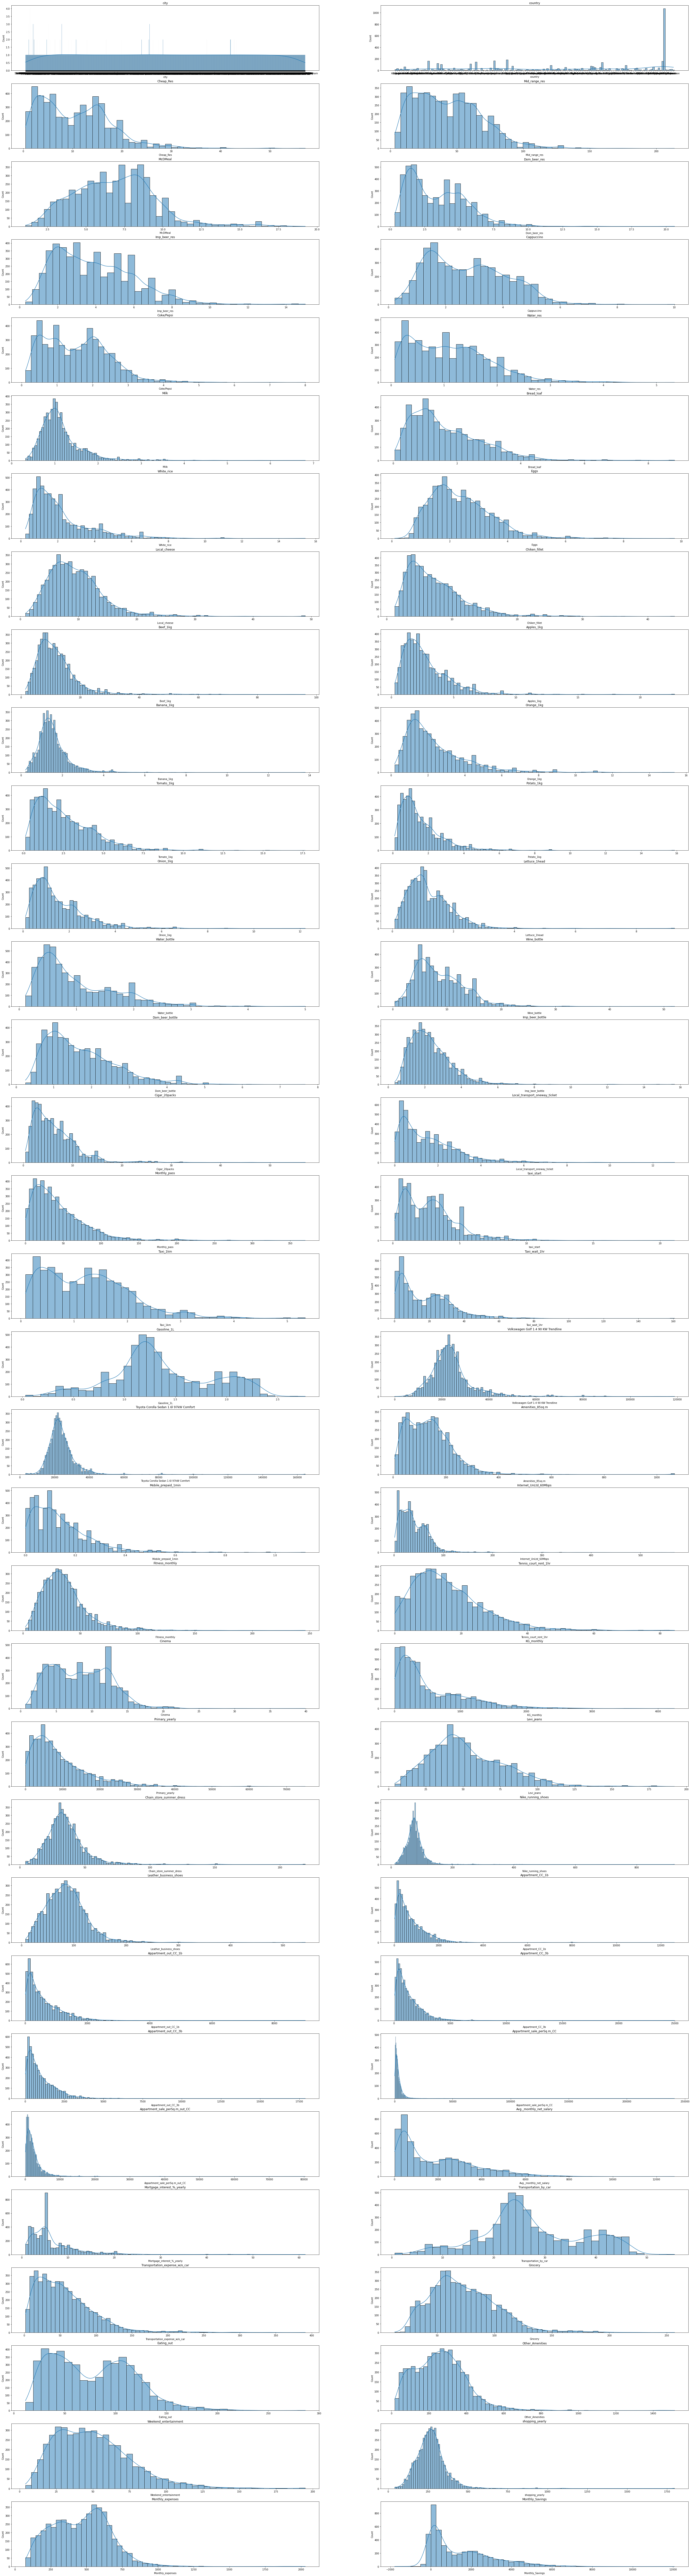

In [24]:
Columns = cleaned_data.columns
fig=plt.figure(figsize=(50,200)) # 59 plots in 2 columns =>31 rows
i=1
for col in Columns:
    plt.subplot(34,2,i)
    #combination of histogram and KDE with seaborns histplot()
    sns.histplot(x=cleaned_data[col], kde=True)
    plt.title(col) #setting title of the histogram to the name of the column
    i=i+1

It can be seen that some columns like costs of chain_store_summer_dress, Leather_business_shoes, Appartmnet_CC_1b, Toyoto Corolla Sedan and Monthly_savings and few others are normally distributed.

The cost of all the apparatments except Appartmnet_CC_1b is distrubuted non-symmetrically starting with highest peak and then reducing. Most of the costs of vegetables and fruits are also distributed in a similar way.

The rest of them all have a bimodel distribution having two peaks.

PLotting the boxplots and histogram side by side for all the attributes:

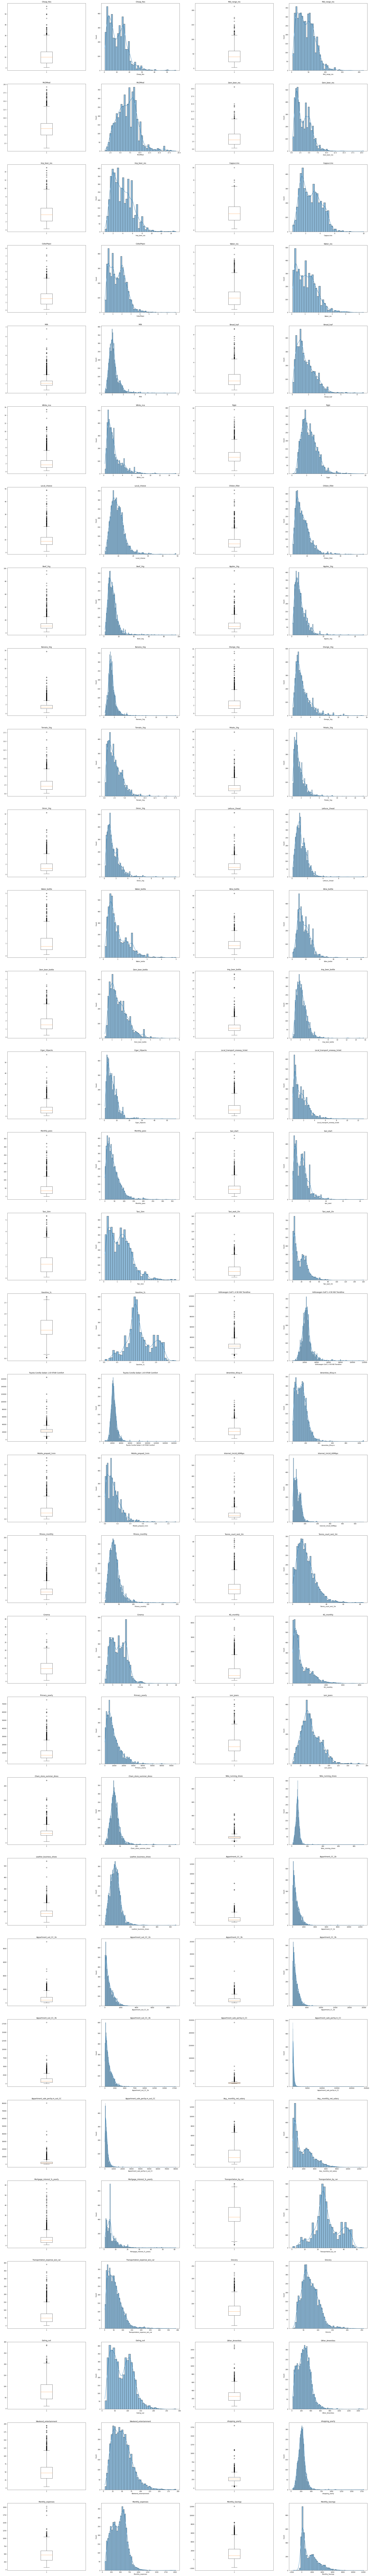

In [25]:
Columns = cleaned_data.iloc[:,2:]
fig=plt.figure(figsize=(45,350)) # size of one single plot-figure, found by trial-and-error
i=0 # setting the initial figure number to 0. One can do this a lot more elegantly, but this works and is straightforward
for col in Columns: #all columns except country, year and Developed are in the iteration list
    i=i+1 #increasing the number of the figure so that they find to the right place
    plt.subplot(34,4,i) # reserving the i-th place in the 31 times 4 subplot
    plt.boxplot(cleaned_data[col]) # creating the boxplot which is added to subplot
    plt.title(col) #setting the title of this plot in the center above the figure (= default)
    i=i+1 #increasing the number for the next figure
    plt.subplot(34,4,i) #telling the subplot where to add the next figure
    sns.histplot(x=cleaned_data[col], kde=True) #create a histogram with a kde as figure
    plt.title(col) #setting title of the histogram
 
fig.savefig('Boxplot&Histogram.jpg') #saving the figure in a file


Removing the outliers and analysing the change in histogram before and after the outlier elimination:

In [26]:
# Example: Comparing boxplot and histogram/kde with and without outliers

fig=plt.figure(figsize=(50,350)) # size of one single plot-figure, found by trial-and-error
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
testData=cleaned_data.copy()
i=0 # setting the initial figure number to 0. One can do this a lot more elegant, but this works and is straightforward
for col in Columns: #all columns except country, year and Developed are in the iteration list
    whiskermin=[]
    whiskermax=[]
    i=i+1 #increasing the number of the figure so that they find to the right place
    plt.subplot(66,4,i) # reserving the i-th place in the 9 times 4 subplot
    plt.boxplot(cleaned_data[col]) # creating the boxplot which is added to subplot
    plt.title(col+'-old') #setting the title of this plot in the center above the figure (= default)
    i=i+1 #increasing the number for the next figure
    plt.subplot(66,4,i) #telling the subplot where to add the next figure
    sns.histplot(x=cleaned_data[col], kde=True, legend=False) #create a histogram with a kde as figure
    plt.title(col+'-old') #setting title of the histogram
    i=i+1
    q25=testData[col].describe()['25%']
    q75=testData[col].describe()['75%']
    whiskermin=q25-1.5*(q75-q25)
    whiskermax=q75+1.5*(q75-q25)
    #whiskermin=q25-1.1*(q75-q25)
    #whiskermax=q75+1.1*(q75-q25)
    #testprint:
    ###rint(col,': whiskwermin= ',whiskermin,' whiskermax= ',whiskermax)
    delIndex=testData[((testData[col] >= whiskermax) | (testData[col] <= whiskermin))].index
    testData=testData.drop(delIndex)
    plt.subplot(66,4,i)
    plt.boxplot(testData[col])
    plt.title(col+'-new')
    i=i+1 #increasing the number for the next figure
    plt.subplot(66,4,i) #telling the subplot where to add the next figure
    sns.histplot(x=testData[col], kde=True) #create a histogram with a kde as figure
    plt.title(col+'-new') #setting title of the histogram
#fig.savefig(outputFilePath+'EliminationOutliers.jpg') #saving the figure in a file

In [27]:
fig.savefig('EliminationOutliers.jpg') #saving the figure in a file

In [28]:
# Determining the number of rows left
print('original number of rows: ',cleaned_data.shape[0])
print('number of rows left: ',testData.shape[0])

original number of rows:  4840
number of rows left:  769


Since the data set has only prices and since the prices are subjected to fluctuations all the time, it was not convincing to consider them to be outlier (as there were too many values denoted as outliers) and not include those extreme prices. Also on comparing the distribution before and after removing the outliers seems to be pretty much the same for all the columns. Hence I decide to use the dataset without removing them for further processing.

Generating heatmap for all the variables:

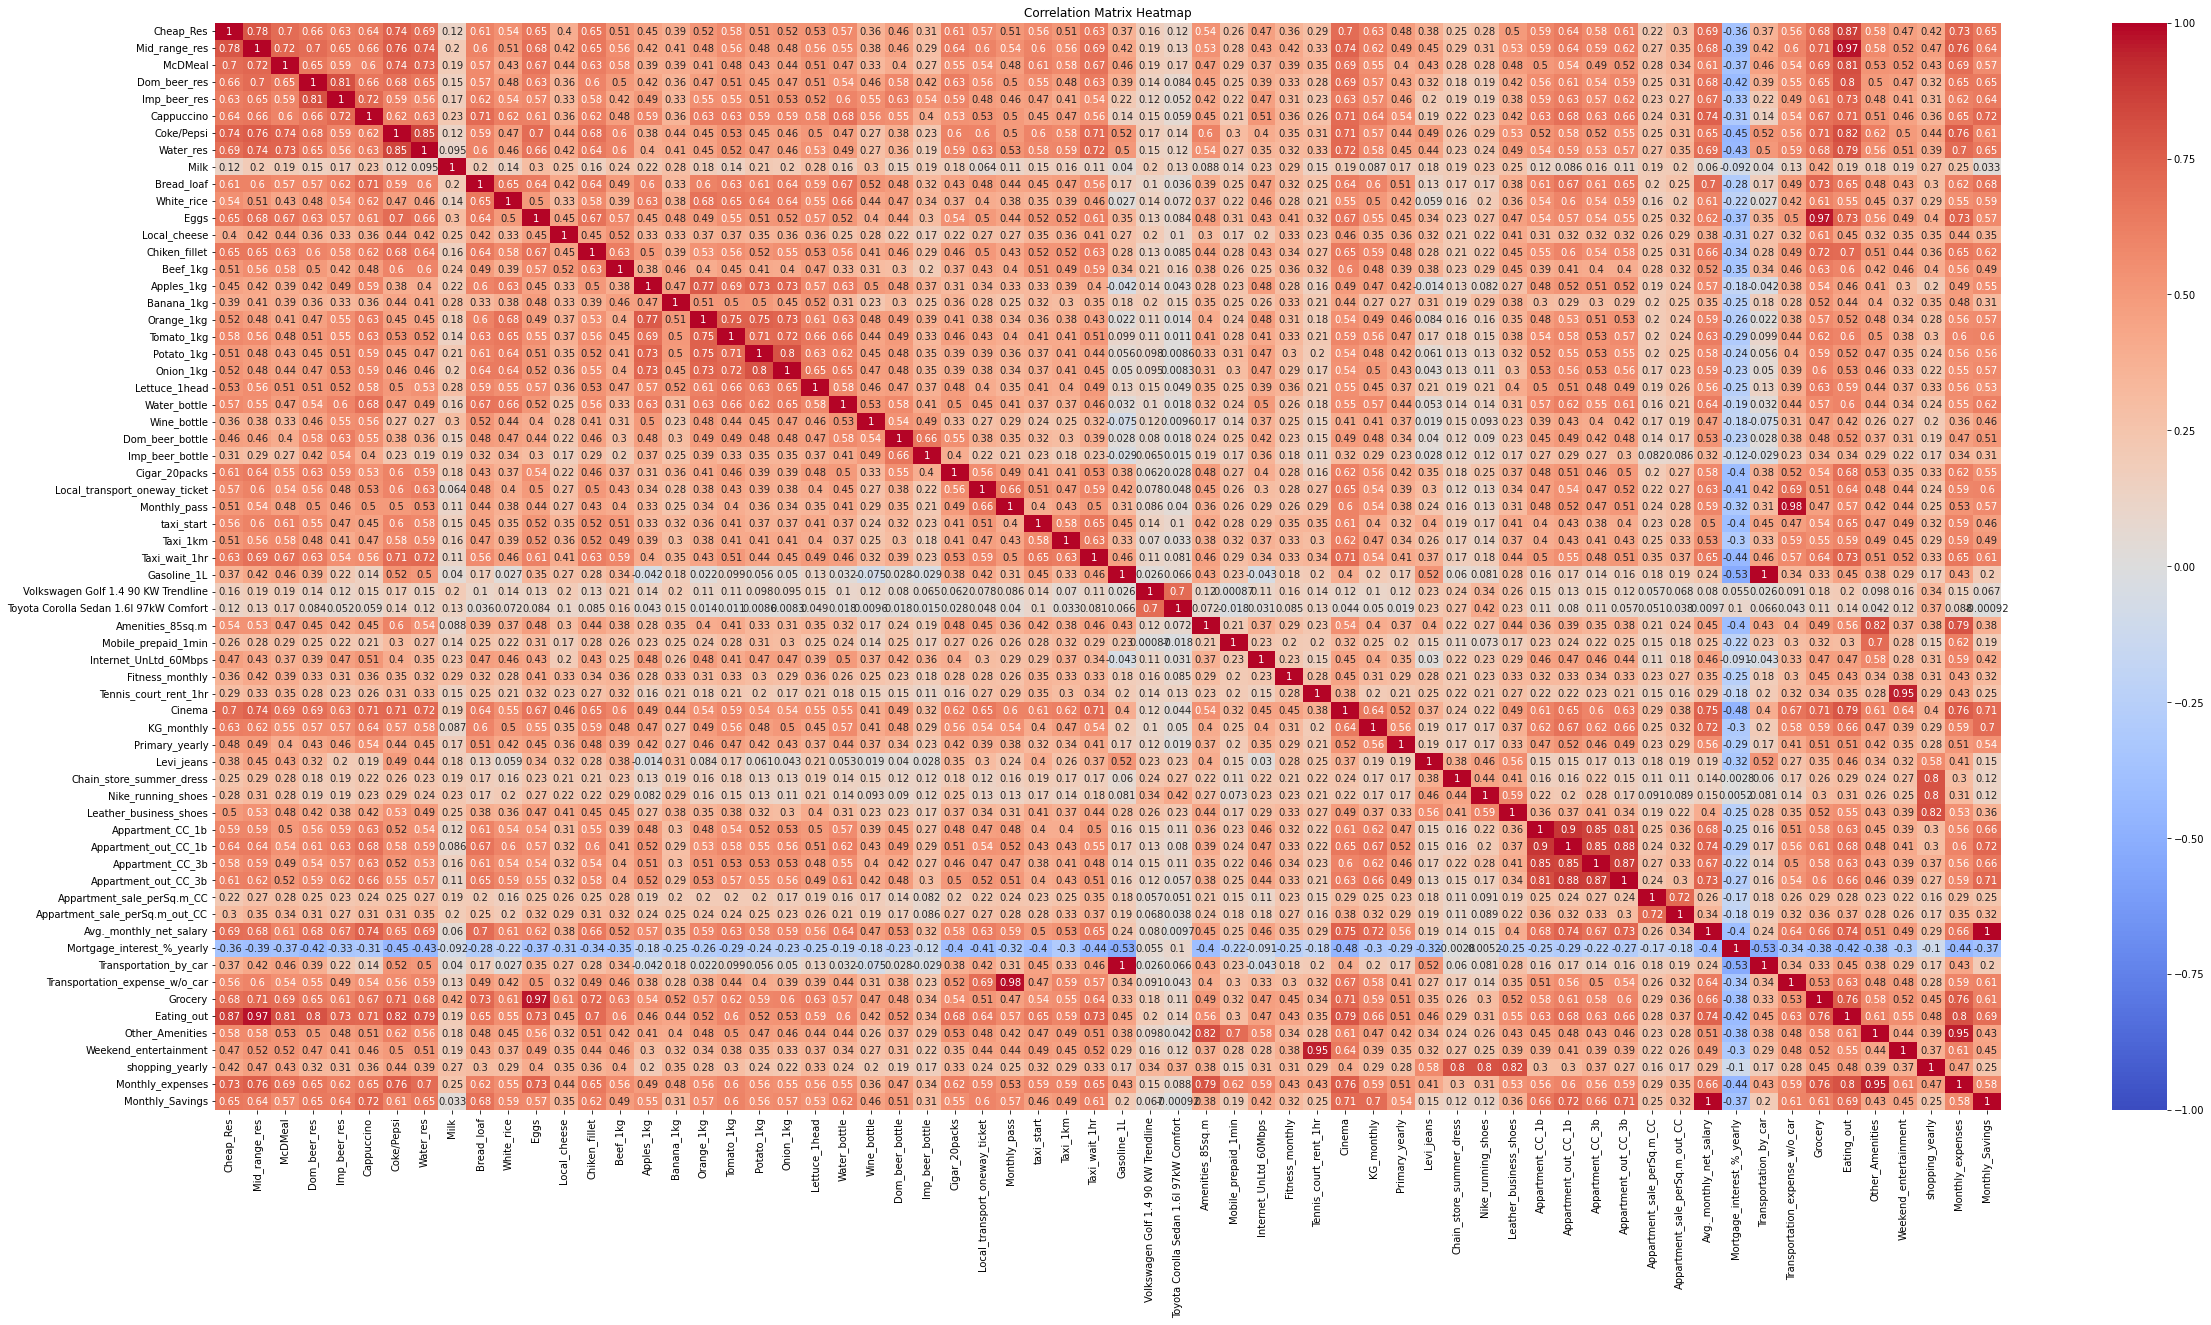

In [29]:
plt.figure(figsize=(40,20))
sns.heatmap(cleaned_data.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

From the heat map, it can be seen that there is a mostly positive correlation between prices of various items as expected since mostly the costs tend to raise and decrease together in the market . 

It is obvious to see that the real estate columns (Appartment rental and owning prices inside and outside the city centre) are highly correlated with each other and form a patch in the heatmap.

Based on my living style, there is a high correlation between the following:




1.   Price of mid range restaurant and eating out expense
2.   Eggs price and grocery expense

1.   Weekend entertainment expense and number of hours playing tennis
2.   Yearly shopping expense and chain store expense, nike expense

Some other but mostly obvious correlations are:


1.   Monthly expenses and amenities expense 
2.   Gasoline price and transportation_expense



Since the heatmap represents the correlation between item prices, there are lots of correlation but not something beyond the obvious considering the nature of the dataset.








Tried plotting the plotmatrix for those columns that depicted a correlation patch in the heatmap to investigate the relationship further. All the columns belong to real-estate and there is a positive relationship seen amongst them which makes sense as real estate related costs are always correalated. I have ploted the kernel density on the lower half. 

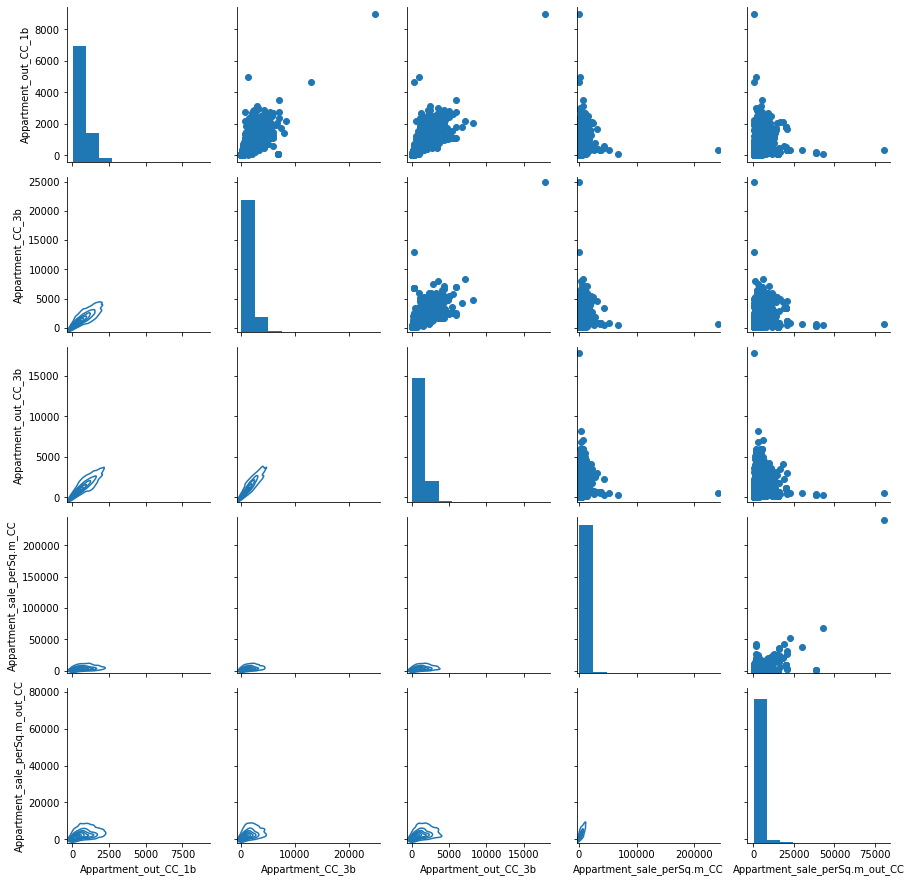

In [30]:
plot = sns.PairGrid(cleaned_data.iloc[:,50:55])
plot.map_diag(plt.hist)
plot.map_upper(plt.scatter)
plot.map_lower(sns.kdeplot)
plt.show()

However the above plot did not help much to solve the aim of the project, I tried to pick some more variables and fing the relationship.

# New Section

Since there is not too many interesting influencing factor, I decided to analyse the correlation between monthly expense and other amenities as it had the highest correlation of 0.95 in the heat map. Also monthly expenses is very relevant to the aim of the project.
Since there was a correlation of 0.82 between Other_Amenities and Amenities_85sq.m, I decided to hue the data points based on this.

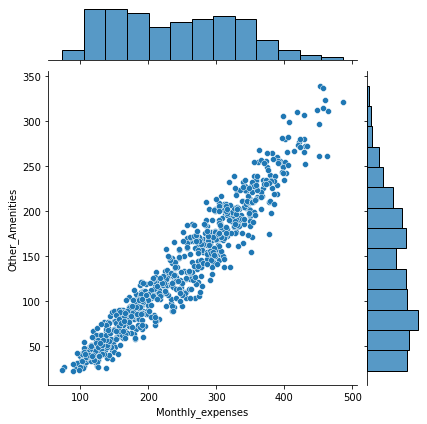

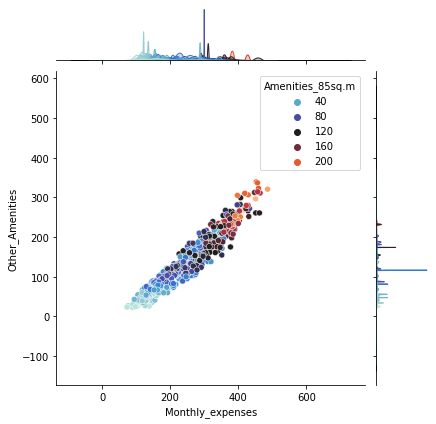

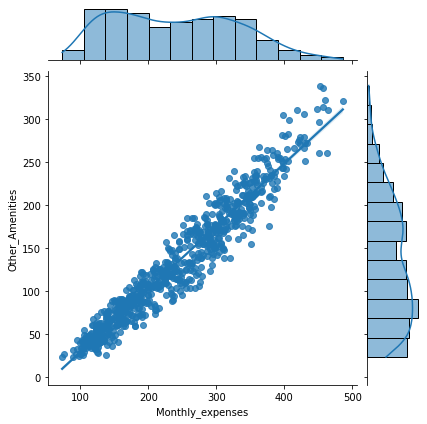

In [31]:
sns.jointplot(data=testData, x='Monthly_expenses', y='Other_Amenities')
# adding hue='Life_expectancy' with palette="icefire"
sns.jointplot(data=testData, x='Monthly_expenses', y='Other_Amenities', hue='Amenities_85sq.m',palette="icefire")
# adding some automatic kernel density estimation and regression
sns.jointplot(data=testData, x='Monthly_expenses', y='Other_Amenities', kind='reg')

From the above plot, it is seen that both the variable have a strong positive correlation depicting that the monthly expenses are highly dependent on the total cost spent on other amenities such as heating, cooling, water, garbage, prepaid and net charges.

**THE CONFUSION:** Although the top expense in the monthly expense was housing rent, the correlation between them was only 0.5. Whereas the correlation between the monthly expense and other amenities was much higher eventhough it was considerably less expense than the housing.

Why?

I investigated it by plotting the correlation between monthly expense and the housing rent for the one bedroom appartment located in the city centre as follows: 


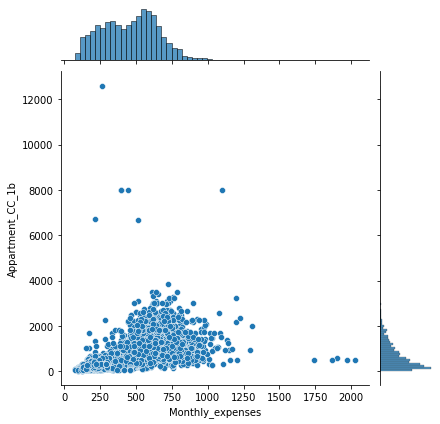

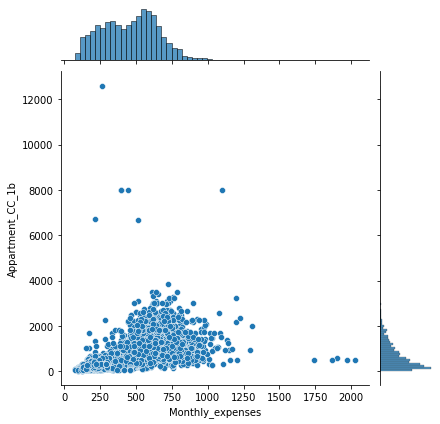

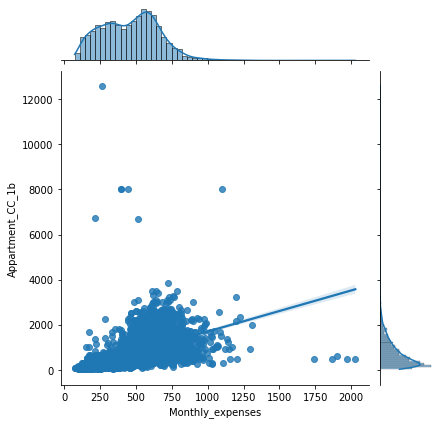

In [32]:
sns.jointplot(data=cleaned_data, x='Monthly_expenses', y='Appartment_CC_1b')
# adding hue='Mortgage_interest_%_yearly' with palette="icefire"
sns.jointplot(data=cleaned_data, x='Monthly_expenses', y='Appartment_CC_1b',palette="icefire")
# adding some automatic kernel density estimation and regression
sns.jointplot(data=cleaned_data, x='Monthly_expenses', y='Appartment_CC_1b', kind='reg')

From the above plot it is clear that there is not much correlation between monthly expense and housing compared to the other pair that has the most positive correlation. 

Thus, it can be concluded that the most influencing factor for monthly expense is Other amenities.

In [33]:
#Getting the correlation values of all the variables with Monthly_expenses and sort in descending order
corr_matrix = cleaned_data.corr()
corr_with_monthly_expenses = corr_matrix['Monthly_expenses']
sorted_correlations = corr_with_monthly_expenses.abs().sort_values(ascending=False)
print(sorted_correlations)

Monthly_expenses                          1.000000
Other_Amenities                           0.949992
Eating_out                                0.799882
Amenities_85sq.m                          0.791538
Grocery                                   0.759204
                                            ...   
Chain_store_summer_dress                  0.296703
Appartment_sale_perSq.m_CC                0.287726
Milk                                      0.245030
Volkswagen Golf 1.4 90 KW Trendline       0.151892
Toyota Corolla Sedan 1.6l 97kW Comfort    0.088051
Name: Monthly_expenses, Length: 64, dtype: float64


Since I wanted to investigate the relationship between Monthly_expenses and Other_Amenities, I framed the following hypothesis:

H0: There is no significant relationship between the said variables
Ha: There is a significant relationship between the said variables

I chose and conducted a regression analysis to test the hypothesis.

As seen from the results in the table below, it can be seen that the p<0.05 

Hence, we can reject the null hypothesis and conclude there exists a significant relationship between the two variables.

In [34]:
#Regression analysis
y = cleaned_data['Monthly_expenses']
X = cleaned_data['Other_Amenities']
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       Monthly_expenses   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          1.866e+05
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                        0.00
Time:                        10:49:35   Log-Likelihood:                         -28087.
No. Observations:                4840   AIC:                                  5.618e+04
Df Residuals:                    4839   BIC:                                  5.618e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [35]:
#Pickling the data set
d_out=open("Global_living_cost.pickle","wb") 
pickle.dump([cleaned_data],d_out) 
d_out.close()

In [36]:
d_in = open("Global_living_cost.pickle","rb") 
[testpickle] = pickle.load(d_in)
d_in.close() 

In [37]:
testpickle.head(3)

city  country  Cheap_Res  Mid_range_res  McDMeal  Dom_beer_res  \
6  Tirana  Albania       5.86          36.04     5.86          1.80   
7   Vlore  Albania       4.51          22.53     3.15          1.80   
8    Fier  Albania       4.05          27.03     5.41          1.08   

   Imp_beer_res  Cappuccino  Coke/Pepsi  Water_res  ...  \
6           2.7        1.41        1.45       0.72  ...   
7           1.8        1.24        1.15       0.53  ...   
8           1.8        1.20        1.14       0.60  ...   

   Mortgage_interest_%_yearly  Transportation_by_car  \
6                        4.44                   42.6   
7                        4.00                   32.8   
8                        5.00                   34.0   

   Transportation_expense_w/o_car  Grocery  Eating_out  Other_Amenities  \
6                           41.42    75.98       59.02           270.63   
7                           36.01    63.00       38.74           124.51   
8                           34.71    48.04       45.14           146.95   

   Weekend_entertainment  shopping_yearly  Monthly_expenses  Monthly_Savings  
6                  50.38           267.49            456.01             7.58  
7                  40.99           228.23            267.24           115.80  
8                  38.10           199.04            278.23           127.27  

[3 rows x 66 columns]

In [38]:
#Saving in Excel
writer = pd.ExcelWriter('cleaned.xlsx')
cleaned_data.to_excel(writer)
writer.save()

NOTE : "The following codes are blocks that I tried out during the analysis and are extra than what is needed. Hence can be ignored."

In [40]:
city_counts = grouped.size()
city_counts = city_counts.sort_values(ascending=False)
top_15 = city_counts.nlargest(15)
top_15

country
United States     1073
Italy              186
India              167
Brazil             164
United Kingdom     160
Germany            147
Russia             139
Canada             120
France             113
China              104
Spain               88
Mexico              87
Philippines         77
Japan               75
Poland              66
dtype: int64

In [44]:
Sweden_data = cleaned_data[cleaned_data['country']=='Sweden']
city_data = Sweden_data['city']
max_salary = Sweden_data.sort_values('Avg._monthly_net_salary', ascending=False)
top_cities = max_salary.head(10)
#print(top_cities[['Avg._monthly_net_salary']])
#print('City name: {}, \t\t Salary: {}'.format(city_data, top_cities))
print('city name:{}, salary:{}'.format(top_cities['city'], top_cities['Avg._monthly_net_salary'] ))


city name:3344    Trollhattan
3343          Lulea
3329      Stockholm
3342       Halmstad
3340       Karlstad
3330     Gothenburg
3335      Linkoping
3331          Malmo
3333       Vasteras
3347       Nykoping
Name: city, dtype: object, salary:3344    3825.22
3343    3205.15
3329    3021.18
3342    2869.72
3340    2866.93
3330    2782.04
3335    2774.50
3331    2757.26
3333    2751.24
3347    2577.04
Name: Avg._monthly_net_salary, dtype: float64


In [45]:
US_data = cleaned_data[cleaned_data['country']=='United States']
#city_data2 = US_data['city']
max_salary = US_data.sort_values('Avg._monthly_net_salary', ascending=False)
top_cities = max_salary.head(10)
#print(top_cities[['Avg._monthly_net_salary']])
#print('City name: {}, \t\t Salary: {}'.format(city_data, top_cities))
print('city name:{}, salary:{}'.format(top_cities['city'], top_cities['Avg._monthly_net_salary'] ))

city name:4671    Bainbridge Island
4233               Elmont
4220            Annapolis
4350        Newport Beach
4250       East Palo Alto
4448          Des Plaines
4373               Conway
4239          Foster City
4670               Hudson
4056             Bellevue
Name: city, dtype: object, salary:4671    9000.00
4233    9000.00
4220    8888.00
4350    8466.00
4250    8346.00
4448    8333.33
4373    8023.23
4239    8000.00
4670    7850.00
4056    7833.33
Name: Avg._monthly_net_salary, dtype: float64


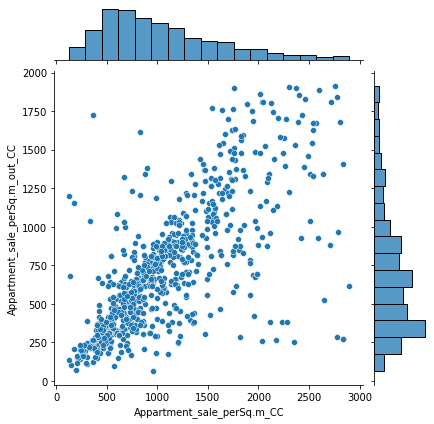

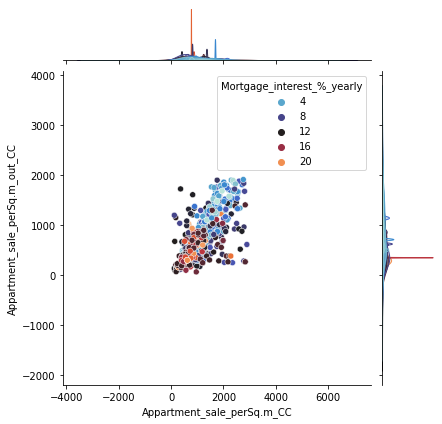

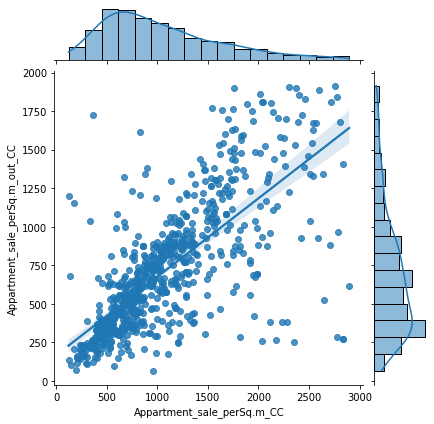

In [47]:
sns.jointplot(data=testData, x='Appartment_sale_perSq.m_CC', y='Appartment_sale_perSq.m_out_CC')
# adding hue='Mortgage_interest_%_yearly' with palette="icefire"
sns.jointplot(data=testData, x='Appartment_sale_perSq.m_CC', y='Appartment_sale_perSq.m_out_CC', hue = 'Mortgage_interest_%_yearly',palette="icefire")
# adding some automatic kernel density estimation and regression
sns.jointplot(data=testData, x='Appartment_sale_perSq.m_CC', y='Appartment_sale_perSq.m_out_CC', kind='reg')

In [48]:
#Regression analysis
y = testData['Appartment_sale_perSq.m_CC']
X = testData['Mortgage_interest_%_yearly']
model = sm.OLS(y, X).fit()
print(model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Appartment_sale_perSq.m_CC   R-squared (uncentered):                   0.514
Model:                                    OLS   Adj. R-squared (uncentered):              0.514
Method:                         Least Squares   F-statistic:                              813.6
Date:                        Mon, 13 Mar 2023   Prob (F-statistic):                   1.34e-122
Time:                                10:51:26   Log-Likelihood:                         -6268.0
No. Observations:                         769   AIC:                                  1.254e+04
Df Residuals:                             768   BIC:                                  1.254e+04
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
                                 coef   

Since I wanted to investigate the relationship between Appartment sale price and the mortgage interest %, I framed the following hypothesis:

H0: There is no significant relationship between the said variables
Ha: There is a significant relationship between the said variables

I chose and conducted a regression analysis to test the hypothesis.

As seen from the results in the table above, it can be seen that the p<0.05 

Hence, we can reject the null hypothesis and conclude there exists a significant relationship between the two variables.

In [49]:
cleaned_data.columns

Index(['city', 'country', 'Cheap_Res', 'Mid_range_res', 'McDMeal',
       'Dom_beer_res', 'Imp_beer_res', 'Cappuccino', 'Coke/Pepsi', 'Water_res',
       'Milk', 'Bread_loaf', 'White_rice', 'Eggs', 'Local_cheese',
       'Chiken_fillet', 'Beef_1kg', 'Apples_1kg', 'Banana_1kg', 'Orange_1kg',
       'Tomato_1kg', 'Potato_1kg', 'Onion_1kg', 'Lettuce_1head',
       'Water_bottle', 'Wine_bottle', 'Dom_beer_bottle', 'Imp_beer_bottle',
       'Cigar_20packs', 'Local_transport_oneway_ticket', 'Monthly_pass',
       'taxi_start', 'Taxi_1km', 'Taxi_wait_1hr', 'Gasoline_1L',
       'Volkswagen Golf 1.4 90 KW Trendline',
       'Toyota Corolla Sedan 1.6l 97kW Comfort', 'Amenities_85sq.m',
       'Mobile_prepaid_1min', 'Internet_UnLtd_60Mbps', 'Fitness_monthly',
       'Tennis_court_rent_1hr', 'Cinema', 'KG_monthly', 'Primary_yearly',
       'Levi_jeans', 'Chain_store_summer_dress', 'Nike_running_shoes',
       'Leather_business_shoes', 'Appartment_CC_1b', 'Appartment_out_CC_1b',
       'Appartment